# Credit Card Fraud detection-Work in Progress (recall ~96.75%)

In [228]:
#import required libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_profiling
%matplotlib inline

# Data ingestion

In [229]:
#Read data from csv

data=pd.read_csv("/Users/shashankkumar/Studies/Self/DataScience/Projects/datasets/CCFraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploring data

In [230]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [231]:
import pandas_profiling
pandas_profiling.ProfileReport(data)


Number of variables,31
Number of observations,284807
Total Missing (%),0.0%
Total size in memory,67.4 MiB
Average record size in memory,248.0 B
Numeric,30
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


Above statistics show that no data is missing. Also, there is no correlation between the exploratory variables. Also, our class variable is highly imbalanced as zero is 284315 and 1 is 492.


# Data Visualization

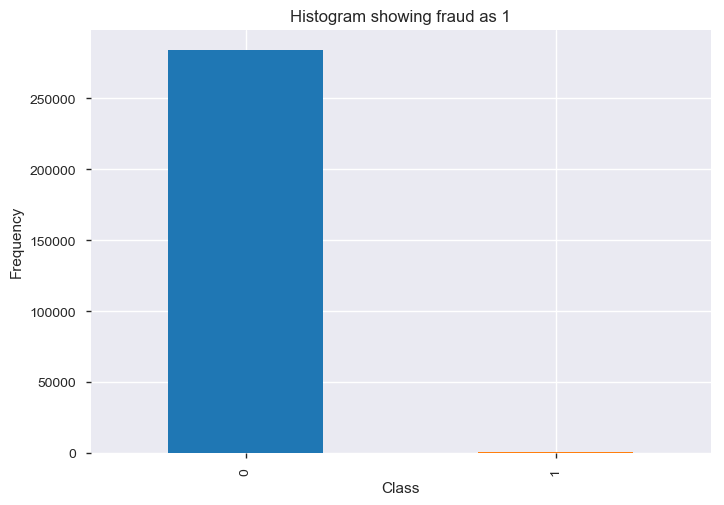

In [232]:
class_count = pd.value_counts(data['Class'], sort = True).sort_index()
class_count.plot(kind = 'bar')
plt.title("Histogram showing fraud as 1")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

# Data Cleaning

Let's fix other problems with the data. For instance, values in Amount column vary a lot. Therefore, it is a good candidate for normalization. Also, time does not look to add much value in the context.

In [233]:
from sklearn.preprocessing import StandardScaler

data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [234]:
#Dividing data into features and labels

X=data.iloc[:,data.columns!='Class']
y=data.iloc[:,-2]
X.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [235]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Splitting the data in train and test sets

In [236]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test=train_test_split(X,y,stratify=y,test_size=0.25)

# Training the model

Decision Tree performs best on imbalanced datasets. Let's train our model with the training data.


In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model=DecisionTreeClassifier()
model.fit(X_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Testing the model

In [238]:
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.999087104295


# Accuracy Analysis

Brilliant! Isn't it? Our model's accuracy is 0.999030926098. But, wait! Let's reflect on what actually happened here. Our data set contained only 492 instances of frauds out of total records 284807. If we multiply our accuracy score with the total number of records, we arrive at a number 284531. Total frauds detected=(284807-284531)=276. Some of these frauds actually happened and some did not(False Positives). Now, think of it from the perspective of business, which is loosing actual money and each miss here may result in loss of thousands of dollars. If you ask a credit card issuing company, they would not want to miss a single case of fraud. In this case, the company would be fine, if you mark some of the genuine transactions too as fradulent as compared to actually missing the real fraud. 

In nutshell, overall accuracy of the model did not serve the purpose of the business. Let's now think what would be an accurate measure of our model performance here. The actual measure of the performance will be the ratio of actual frauds detected to actual number of fraudulent transactions. This ratio is referred to as recall(True Positive Rate) or sensitivity. In other words, recall is the measure of how often the prediction is correct when the actual value is positive. Let's calculate recall using recall_score function of sklearn.

In [239]:
def re_score(y_test,model):
    re_score=recall_score(y_test, model, labels=None, pos_label=1, average = 'binary', sample_weight=None)
    return re_score
print("The recall score for the model with biased dataset is ", re_score(y_test,prediction))

The recall score for the model with biased dataset is  0.756097560976


In this case, we want to maximize our True Positive Rate(tpr) and minimize False Positive Rate(fpr). Fortunately, we have a tool to analyse this. We can visually present the relation between tpr and fpr with Receiver Operating Curve. Let's see how ROC can help us here.

# Receiver Operating Curve(ROC)

In [240]:
# calculate the fpr and tpr for all thresholds of the classification
probs=model.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr, threshold=metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr, tpr)



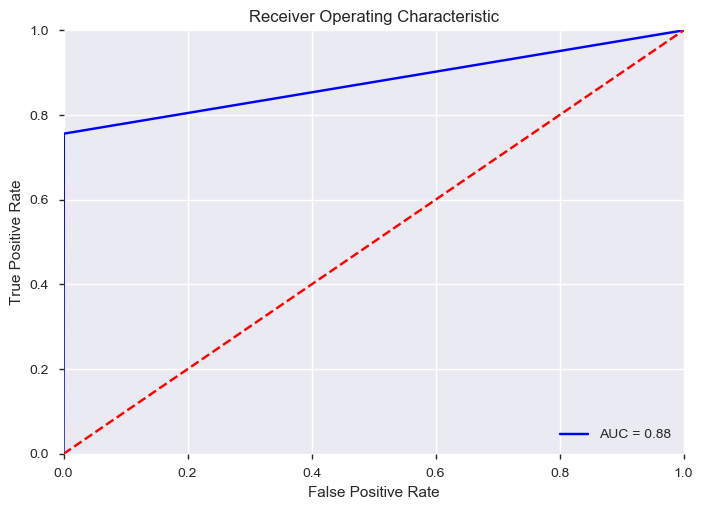

In [241]:
#plotting the tpr and fpr
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In above curve, the best performance of the classifier will be when the blue line touches extreme left corner of the graph. According to the ROC, our tpr is maximum at the cost of zero fpr. Let's take a step back further to see what else can be done to improve our model's performance. 

Our data has high imbalance. The problem with our classifier is that it has seen most of the cases where the class output was zero and that's why it was unable to learn the behaviour of class 1 correctly. There are various techniques which we can utilize here to improve our input data which can be fed to our classfier for better performance. One such technique is undersampling. In this sampling technique, the classifier is fed with the samples with both classes in 50-50 ratio. Let's see how we can acheive the same.


# Undersampling

In [242]:
#number of frauds in the whole dataset
number_of_frauds=len(data[data.Class==1])

#indices of the fraud and non-fraud classes
minority_indices=np.array(data[data.Class==1].index)
majority_indices=np.array(data[data.Class==0].index)

#Select randomly equal number of data points from the minority class
random_majority_indices=np.random.choice(majority_indices, number_of_frauds, replace=False)
random_majority_indices=np.array(random_majority_indices)

#Create random sample with 50-50 fraud and non-fraud cases
under_sampled_indices=np.concatenate([random_majority_indices,minority_indices])
under_sampled_data=data.iloc[under_sampled_indices,:]


# ratio of fraud and non fraud transactions 
print("Ratio of non-fraud transactions to the total number of transactions: ", len(under_sampled_data[under_sampled_data.Class == 0])/len(under_sampled_data))
print("Ratio of fraud transactions to the total number of transactions: ", len(under_sampled_data[under_sampled_data.Class == 1])/len(under_sampled_data))
print("Total number of transactions in resampled data: ", len(under_sampled_data))



Ratio of non-fraud transactions to the total number of transactions:  0.5
Ratio of fraud transactions to the total number of transactions:  0.5
Total number of transactions in resampled data:  984


In [243]:
#Divide the data into feature and label
X_under = under_sampled_data.iloc[:, under_sampled_data.columns != 'Class']
y_under = under_sampled_data.iloc[:, -2]

# Split undersampled dataset into train/test sets

In [244]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_under
                                                                                                   ,y_under
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)

# Training the Decision Tree classifier with undersampled data

In [245]:
#Decisition Tree Classifier
from sklearn.metrics import recall_score
model=DecisionTreeClassifier()
model.fit(X_train_undersample,y_train_undersample)
prediction=model.predict(X_test_undersample)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction_under,y_test_undersample))


The accuracy of the Decision Tree is 0.898648648649


In [246]:
print('The recall score of the Decision Tree with undersampled data is', re_score(y_test_undersample,prediction))


The recall score of the Decision Tree with undersampled data is 0.89932885906


# Testing the trained model performance on Original Test Dataset

In [247]:
prediction=model.predict(X_test)
print('The recall score of the Decision Tree on original test dataset is', re_score(y_test,prediction))

The recall score of the Decision Tree on original test dataset is 0.975609756098


# Conclusion

We were able to improve our model's recall score from approx 79.67% to 96.75%. Let's analyse how did this happen. Initially, our model was trained with a highly imbalanced dataset where most of the classes were 0 and our model was not able to learn behaviour of class 1 properly. When we exposed the same model with a dataset which had equal number of class 0 and class 1, it learned the behaviour of class 1 better which is more important to identify as per the business case under consideration.